In [1]:
figdir = '../../figure/hopping'

os.makedirs(figdir, exist_ok=True)

In [2]:
from scipy.misc import factorial
from scipy.special import eval_hermite
from scipy.constants import hbar, proton_mass

λ = 1064e-9
k = 2*np.pi / λ
a = λ / 2
V_0 = -50

x = -a + 2*a*np.linspace(0, 1, 1000)
y = x / 2.2

V_lat = V_0 * np.cos(k*x)**2
V_har = V_0 * (1-(k*y)**2 / 2)

E = np.sqrt(2*np.abs(V_0))

def wavefunction_harmonic(n, x):
    scale = (2 / np.abs(V_0))**(1/4) / k
    
    x = x.copy()
    x /= scale
    
    return np.exp(-x**2 / 2) * eval_hermite(n, x) / np.sqrt(2**n * factorial(n) * np.sqrt(np.pi))

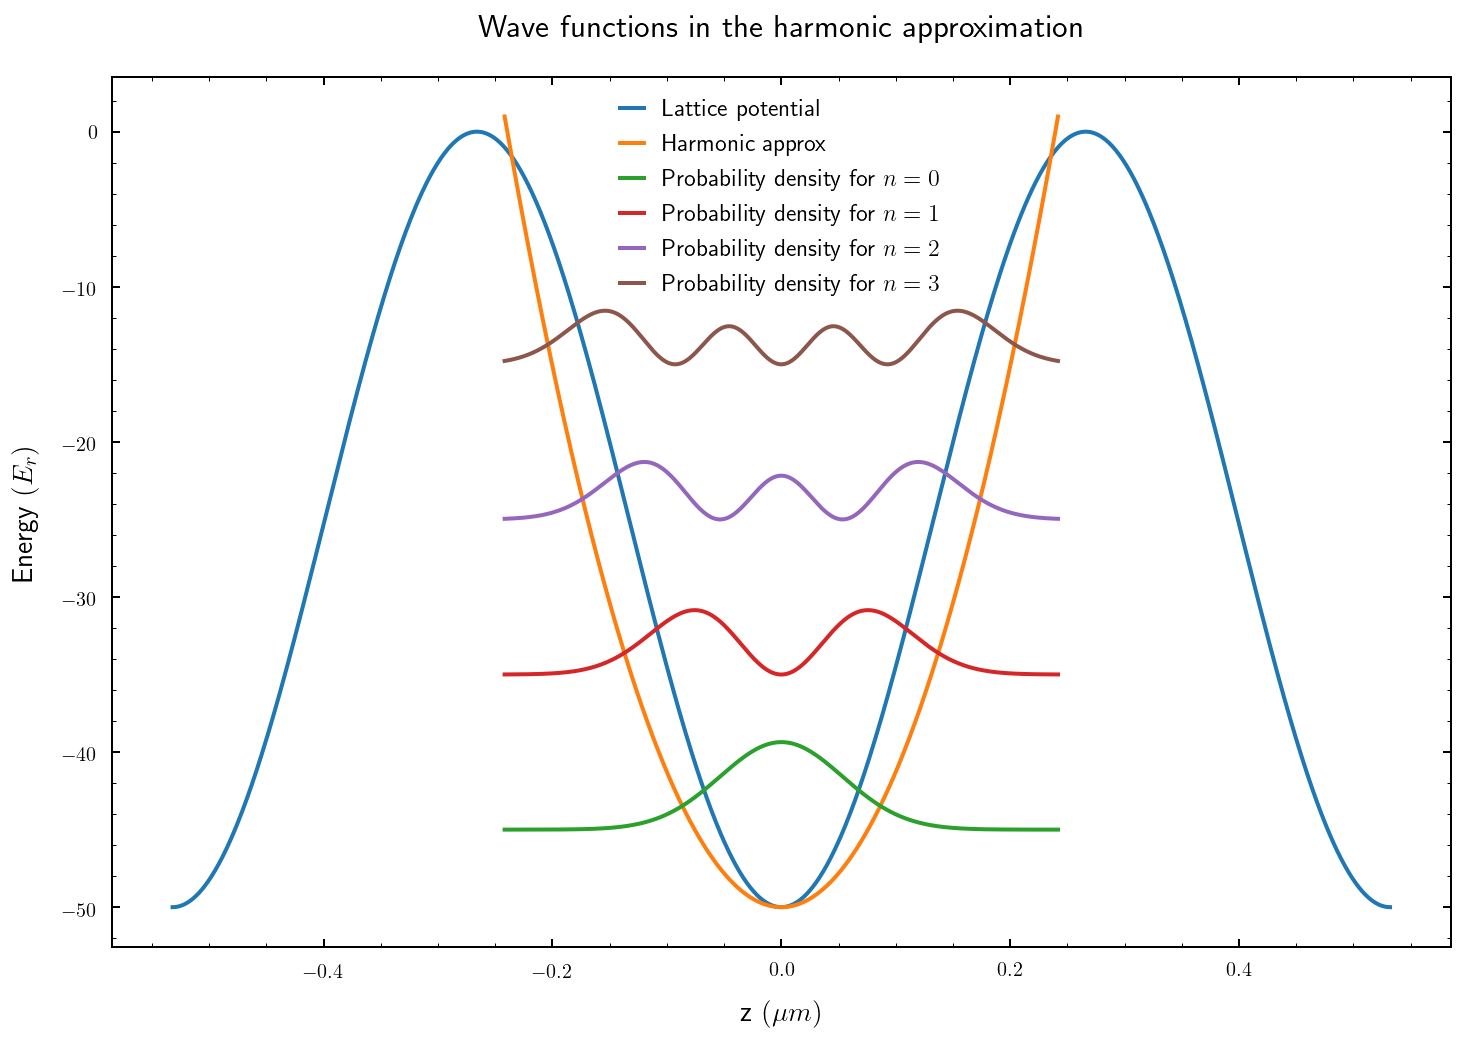

In [3]:
plt.figure(figsize=(12, 8))

plt.plot(x / 1e-6, V_lat, label='Lattice potential')
plt.plot(y / 1e-6, V_har, label='Harmonic approx')

for n in range(4):
    plt.plot(y / 1e-6, V_0 + E*(n+.5+wavefunction_harmonic(n, y)**2), label=f'Probability density for $n = {n}$')

plt.title('Wave functions in the harmonic approximation')
plt.xlabel('z $(\mu m)$')
plt.ylabel('Energy $(E_r)$')
plt.legend()
plt.savefig(os.path.join(figdir, 'harmonic.pdf'))
plt.show()